<a href="https://colab.research.google.com/github/Leegyu66/ML-and-DL-beginner/blob/main/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0 # Conv2D 층을 사용하기 위해 마지막에 채널 차원을 추가해야함(4차원)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [24]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1))) # 3,3 커널, 활성화 함수는 relu, 패딩은 세임패딩딩, input_shape는 (28, 28, 1)이다

- 합성곱 층에 패딩을 추가했으므로 커널을 지나도 사이즈는 유지된다
- 합성곱 층이 32개 이므로 깊이는 32이 된다다
- 풀링이 2, 2 이므로 풀링을 지나면 특성 맵의 사이즈가 (14, 14, 32)가 된다

In [25]:
model.add(keras.layers.MaxPooling2D(2)) # 2x2 풀링 추가

In [26]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')) # 두 번째 합성곱-풀링층 추가 특성 맵의 깊이는 64
model.add(keras.layers.MaxPooling2D(2))

In [27]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) # 드롭아웃을 넣어서 과대적합을 막음음
model.add(keras.layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

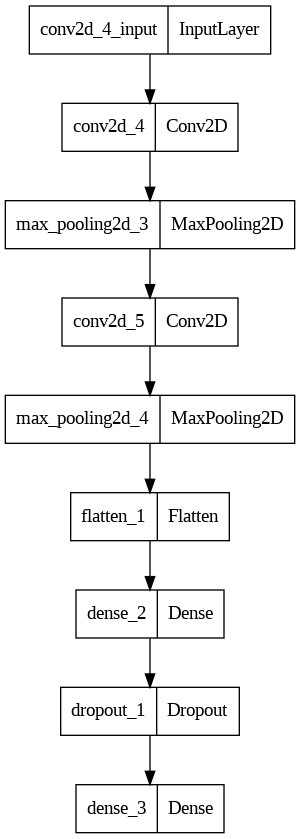

In [29]:
keras.utils.plot_model(model)

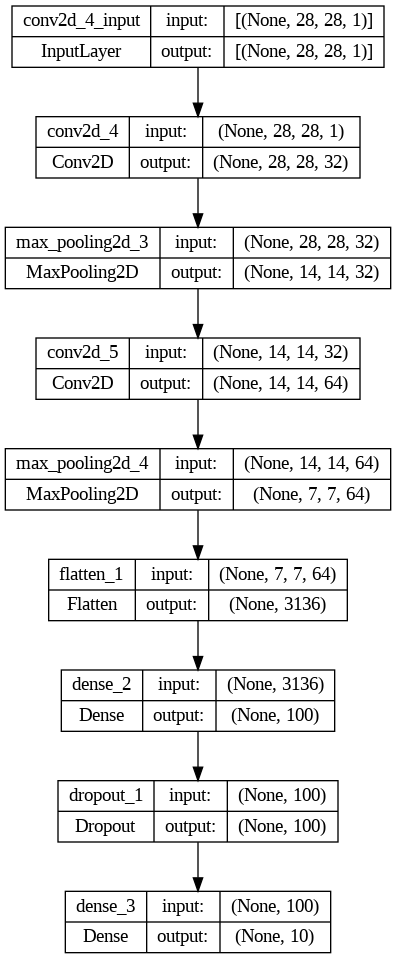

In [30]:
keras.utils.plot_model(model, show_shapes=True)

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 108s 71ms/step - loss: 0.5243 - accuracy: 0.8120 - val_loss: 0.3369 - val_accuracy: 0.8734
Epoch 2/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.3462 - accuracy: 0.8757 - val_loss: 0.2815 - val_accuracy: 0.8955
Epoch 3/20
1500/1500 [==============================] - 77s 52ms/step - loss: 0.2969 - accuracy: 0.8943 - val_loss: 0.2536 - val_accuracy: 0.9074
Epoch 4/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2679 - accuracy: 0.9035 - val_loss: 0.2466 - val_accuracy: 0.9085
Epoch 5/20
1500/1500 [==============================] - 83s 55ms/step - loss: 0.2394 - accuracy: 0.9134 - val_loss: 0.2263 - val_accuracy: 0.9146
Epoch 6/20
1500/1500 [==============================] - 76s 50ms/step - loss: 0.2239 - accuracy: 0.9180 - val_loss: 0.2308 - val_accuracy: 0.9143
Epoch 7/20
1500/1500 [==============================] - 76s 50ms/step - loss: 0.2044 - accuracy: 0.9245 - val_loss: 0.2359 

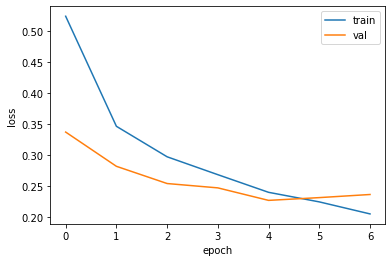

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [33]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 7s 17ms/step - loss: 0.2263 - accuracy: 0.9146


[0.22634676098823547, 0.9145833253860474]

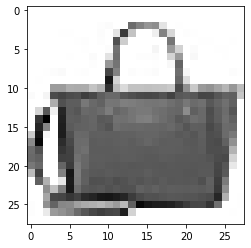

In [35]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [36]:
preds = model.predict(val_scaled[0:1]) # 차원 유지때문에 슬라이싱을 해야한다
print(preds)

1/1 [==============================] - 0s 115ms/step
[[1.5839379e-17 8.4583441e-25 4.7605924e-21 3.9167952e-20 5.8621103e-21
  1.7974021e-14 2.0848029e-19 3.3052727e-14 1.0000000e+00 4.0869604e-17]]


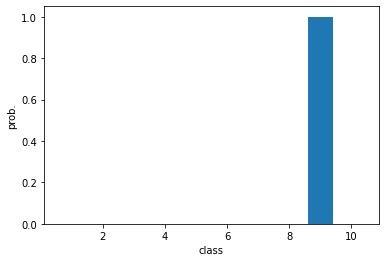

In [37]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [38]:
classes = ['티셔츠', '바지', '스웨터', '트레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [40]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [41]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [42]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 7s 22ms/step - loss: 0.2443 - accuracy: 0.9098


[0.24429336190223694, 0.9097999930381775]